<a href="https://colab.research.google.com/github/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Modelagem_para_Diagn%C3%B3stico_de_Dados_Cl%C3%ADnicos_com_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagnóstico de Dados Clínicos com Machine Learning

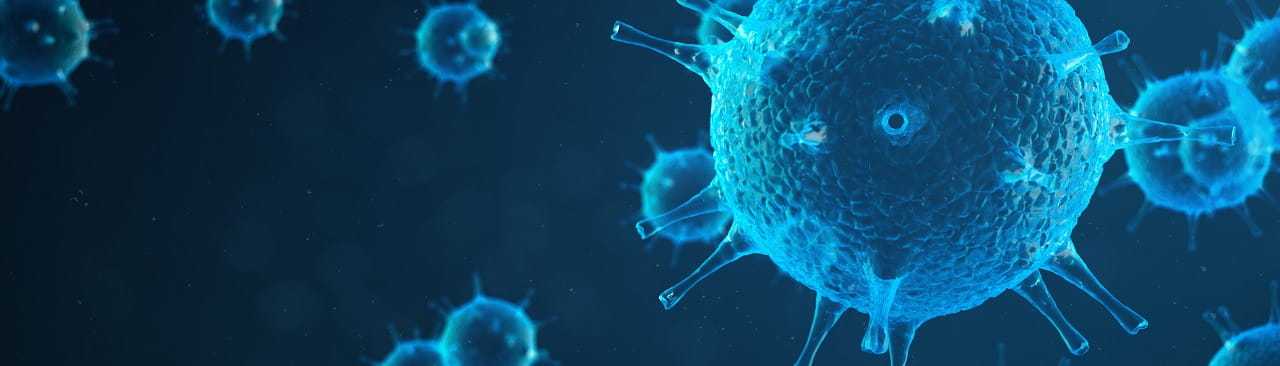

Bootcamp Data Science Alura

Autor: Rodrigo de Mendonça 

<a href="https://www.linkedin.com/in/rodrigomendonça/" alt="linkedin" target="_blank">
<img src="https://img.shields.io/badge/LinkedIn-%230077B5.svg?&style=flat-square&logo=linkedin&logoColor=white">
</a>

<a href="mailto:<rodrigodemend@gmail.com>" alt="gmail" target="_blank">
<img src="https://img.shields.io/badge/-Gmail-FF0000?style=flat-square&labelColor=FF0000&logo=gmail&logoColor=white&link=mailto:<SEUEMAIL>" />
</a>

Este é o projeto final do Bootcamp Data Science da Alura! Nele eu pude demonstrar todo o conhecimento adquirido durante o Bootcamp, aplicando em um caso real de dados disponibilizados pelo hospital Sírio-Libanês. O principal objetivo é a construção de um modelo de machine learning capaz de detectar quais pacientes do hospital Sírio-Libanês que foram internados, irão agravar seus casos e precisarão de leito de UTI.

## Descrição do Problema

A pandemia do COVID-19 sobrecarregou o sistema de saúde, que não estava preparado para uma demanda tão grande de leitos de UTI, profissionais capacitados, equipamentos de proteção individual, entre outros recursos. Com recursos escassos, ter em mãos a previsão de quais pacientes irão precisar utilizar esses recursos é de suma importância.

A partir do momento em que o paciente é internado no hospital Sírio-Libanês, ele(a) terá o acompanhamento dos sinais vitais e será submetido a exames de sangue. Unindo essas informações com as informações demográficas e grupo de doenças prévias do paciente, iremos prever se o paciente irá ter seu caso agravado e precisará utlizar leitos de UTI. Essa previsão deve ser o mais rápido possível, dando tempo para que os recursos da UTI possam ser organizados ou a transferência de pacientes possa ser agendada.

Agora que já temos ciência do problema que iremos resolver, vamos botar a mão na massa!!

# O que vou encontrar nesse Notebook

Este notebook tem como objetivo a modelagem do problema por meio de algoritmos de machine learning. Mas antes de criar modelos de machine learning, nós iremos fazer uma exploração dos dados e engenharia de atributos com o objetivo de buscar por possíveis atributos que possa ajudar nosso modelo a diferenciar entre os pacientes que irão para UTI e os que não não irão. 

Além de buscar por novos atributos escondidos nos dados, também iremos ajustar as escalas para que nosso modelo não de preferência para um atributo apenas porque está em uma escala diferente dos demais.

Também iremos fazer o balanceamento das classes utilizando uma técnica conhecida como SMOTE. O balanceamento dos dados é algo importante pois se tivermos muito mais dados de apenas uma classe, nosso modelo poderá prever tudo para essa classe e mesmo assim ele ainda terá uma suposta boa avaliação de performace.

Uma vez definidos os atributos que iremos treinar nosso modelo, vamos passar para uma etapa muito importante que é a seleção dos melhores atributos. Aqui, iremos reduzir significativamente a quantidade de atributos que nosso modelo irá utilizar para treinamento, aumentando a capacidade de generalização do modelo e se tornando mais fácil para implementação em produção.

Nós iremos criar dois algoritmos de machine learning. O primeiro será uma Regressão Logística, onde iremos fazer a seleção dos melhores atributos, eliminando os atributos correlacionados e aplicando a técnica do Step Backward Selection para selecionar apenas os atributos que são importantes para a Regressão Logística.

Além disso iremos também trabalhar na otimização dos hiperparâmetros e vamos fazer uma análise nos dados de validação que nosso modelo errou, buscando por padrões que poderemos criar novos atributos que ajudarão nosso modelo a melhorar a performace.

Após isso, iremos seguir os mesmos passos da criação do modelo da Regressão Logística para criar uma Floresta Aleatória. Após a criação e otimização dos dois modelos, iremos fazer uma comparação entre eles a fim de escolher qual melhor se adequa para solucionar nosso problema.

# Bibliotecas

O primeiro passo em qualquer projeto de machine learning é a importação das bibliotecas que serão utilizadas no projeto.

Nós iremos utilizar bibliotecas comumente usadas em projeto de machine learning como pandas, numpy, sklearn, matplotlib, seaborn, etc.

## Bibliotecas Utilizadas

Aqui nós temos a lista de todas as bibliotecas utilizadas nesse projeto e suas respectivas versões:


*   pandas (V.1.1.5)
*   numpy (V.1.19.5)
*   matplotlib (V.3.2.2)
*   seaborn (V.0.11.2)
*   sklearn (V.1.0.2)
*   imblearn (V.0.8.1)
*   feature_engine (V.1.2.0)
*   mlxtend (V.0.14.0)
*   skopt (V.0.9.0)
*   joblib (V.1.1.0)

## Bibliotecas que não vem por padrão no Google Colab

Aqui nós temos algumas instalações de bibliotecas que não vem por padrão no Google Colab.

In [ ]:
# feature_engine
!pip install feature_engine

# scikit-optimize
!pip install scikit-optimize

# mlxtend
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

## Importação das Biblitecas

Como forma de organização, separamos a importação das bibliotecas comentando para qual finalidade estamos importando aquela biblioteca.

In [ ]:
# Manipulação dos Dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento de variáveis categóricas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Pré processamento dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from imblearn.over_sampling import SMOTENC

# Seleção de Variáveis
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import SmartCorrelatedSelection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Validação 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

# Métricas
from sklearn.metrics import roc_auc_score

# Otimização de Hiperparâmetros
from skopt.plots import plot_convergence
from skopt import gp_minimize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Salvando os modelos
from joblib import dump, load

# Warnings
import warnings
warnings.filterwarnings('ignore')


# Funções Utilizadas

Aqui, irei fazer a importação de um notebook tem como objetivo reunir todas as funções criadas durante o desenvolvimento do projeto. 

Criei um notebook separado para essas funções para que o projeto fique mais limpo e organizado.

Caso tenha interesse, é possível acessar o notebook clicando [aqui](https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Funcoes_utilizadas.ipynb).

Clonando o repositório.

In [ ]:
!git clone https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning

Rodando o notebook com as funções.

In [ ]:
%run '/content/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/Notebooks/Funcoes_utilizadas.ipynb'

# Importação dos Dados

Nesta seção estamos fazendo a importação dos dados que serão utilizados para a criação do modelo.

Os dados foram obtidos através do [Kaggle](https://www.kaggle.com/Sírio-Libanes/covid19) onde o hospital Sírio-Libanês disponibilizou os dados mencionados acima de pacientes que já foram internados, contendo tanto pacientes que foram para UTI, quanto pacientes que não agravaram seus casos e não precisaram de leitos de UTI.

Nós temos as informações demográficas e grupo de doenças prévias do paciente, além disso também temos os sinais vitais e exames de sangue que estão sendo coletados em intervalos de 2 horas.

Porém, como queremos dar a informação se o paciente precisará de um leito de UTI o mais cedo possível, iremos prever com base apenas nos sinais vitais e exames de sangue das primeiras duas horas do paciente no hospital, fazendo com que todos os profissionais do hospital fiquem cientes durante as primeiras duas horas após a internação do paciente, se aquele paciente que estão atendendo irá precisar ou não de um leito de UTI.

Afim de organizar melhor o projeto, os dados que utilizaremos foram importados e limpos neste [Notebook](https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Importação_e_Limpeza_dos_Dados.ipynb) que se encontra nesse mesmo repositório. Agora iremos importar os dados já limpos e pronto para análise.

In [ ]:
# Importando dados limpos
dados = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Cleaned/cleaned_data.csv',
                    sep =',')
# Visualizando os dados
dados.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,...,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,1,60th,0,0,0,0,0,1,1,0,0,1,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.994912,-0.994912,-1.0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,0,10th,0,0,0,0,0,0,0,0,0,1,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,...,-0.978029,-0.978029,-1.0,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0,40th,1,0,0,0,0,0,0,0,1,1,-0.263158,-0.263158,-0.263158,-0.263158,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.972789,-0.972789,-0.972789,...,-0.978029,-0.978029,-1.0,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0,10th,0,0,0,0,0,0,0,0,0,1,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.935113,-0.935113,-0.935113,...,-1.000000,-1.000000,-1.0,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
4,0,10th,0,0,0,0,0,0,0,0,0,1

# Exploração dos Dados e Engenharia de Atributos

Antes de pensar em criar um modelo preditivo, temos que primeiro fazer a engenharia de atributos que consiste em sua maioria de fazer uma análise exploratória nos dados e buscar por possíveis atributos que poderemos passar para nosso modelo aprender qual paciente irá para UTI e qual paciente não irá.

Além de buscar por novos atributos escondidos nos dados, também iremos ajustar as escalas para que nosso modelo não de preferência para um atributo apenas porque está em uma escala diferente.


## Balaceamento dos Dados

Nosso projeto consiste em construir um modelo capaz de prever se um paciente internado no hospital Sírio-Libanês irá agravar seu caso e irá para a UTI ou se essa paciente não precisará de UTI. Portanto, estamos trabalhando com um problema de classificação de 2 classes.

Com isso em mente, o balanceamento dos dados é algo importante pois se tivermos muito mais dados de apenas uma classe, nosso modelo poderá prever tudo para essa classe e mesmo assim ele ainda terá uma suposta boa avaliação de performace.

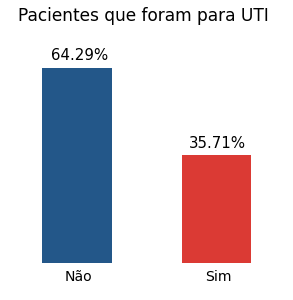

In [ ]:
# Visualizando gráficamente o desbalanceamento dos dados
ax=round(dados['ICU'].value_counts(normalize=True)*100, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 80)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.085, -6.0, "Não", fontsize=14)
plt.text(0.92, -6.0, "Sim", fontsize=14)
# Porcentagens
ICU_Nao = round(dados['ICU'].value_counts(normalize=True)*100, 2)[0]
ICU_Sim = round(dados['ICU'].value_counts(normalize=True)*100, 2)[1]
plt.text(-0.185, 67, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, 38, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.text(-0.42, 80,'Pacientes que foram para UTI', fontsize=17)
plt.show()

Nós temos praticamente 65% dos dados referentes a pacientes que não foram para UTI e apenas 35% de pacientes que realmente foram para UTI. 

Com isso, vemos a necessidade de balancear os dados antes de entregar para um modelo de machine learning. 

Porém, iremos fazer esse balanceamentos apenas no momento certo, por enquanto vamos manter os dados originais para que possamos continuar com nossa análise.

## Pacientes acima dos 65 anos

Vamos análisar os pacientes que estão acima de 65 anos. O hospital Sírio-Libanês criou um atributo especificadamente para isso chamado AGE_ABOVE65.

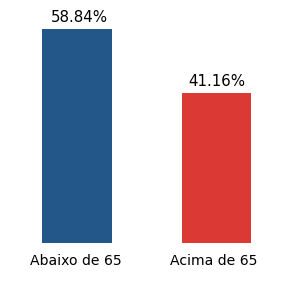

In [ ]:
# Visualizando gráficamente o desbalanceamento dos dados
ax=round(dados['AGE_ABOVE65'].value_counts(normalize=True)*100, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 65)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.34, -6.0, 'Abaixo de 65', fontsize=14)
plt.text(0.67, -6.0, 'Acima de 65', fontsize=14)
# Porcentagens
ICU_Nao = round(dados['AGE_ABOVE65'].value_counts(normalize=True)*100, 2)[0]
ICU_Sim = round(dados['AGE_ABOVE65'].value_counts(normalize=True)*100, 2)[1]
plt.text(-0.185, 61, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, 43.32, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.show()

Temos 41% dos pacientes acima dos 65 anos, isso comprova que o virus está afetando principalmente a população mais idosa.

In [ ]:
# Dicionário para melhor visualização dos dados
dict_grafico_age_above65 = {0:'Não', 1:'Sim'}
dict_grafico_ICU = {0:'Não', 1:'Sim'}

# Visualizando uma tabela cruzada
freq = pd.crosstab(dados['AGE_ABOVE65'].map(dict_grafico_age_above65), dados['ICU'].map(dict_grafico_ICU), rownames=['Acima dos 65'], colnames=['Foram para UTI?'])
freq['Percentual_que_foram_para_UTI(%)'] = round((freq['Sim'] / (freq['Sim'] + freq['Não']))*100,2)

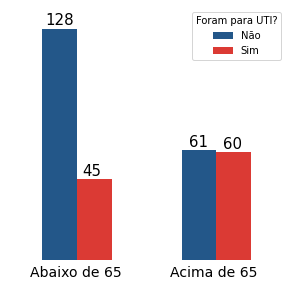

In [ ]:
# Visualizando gráficamente o desbalanceamento dos dados
ax=freq[['Não', 'Sim']].plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 140)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.34, -9.0, 'Abaixo de 65', fontsize=14)
plt.text(0.67, -9.0, 'Acima de 65', fontsize=14)
# Não
Nao_Foram_para_UTI = freq['Não'][0]
Foram_para_UTI = freq['Não'][1]
plt.text(-0.225, Nao_Foram_para_UTI + 2.0, str(Nao_Foram_para_UTI), fontsize=15)
plt.text(0.8, Foram_para_UTI + 2.0, str(Foram_para_UTI), fontsize=15)
# Sim
Nao_Foram_para_UTI = freq['Sim'][0]
Foram_para_UTI = freq['Sim'][1]
plt.text(0.04, Nao_Foram_para_UTI + 2.0, str(Nao_Foram_para_UTI), fontsize=15)
plt.text(1.05, Foram_para_UTI + 2.0, str(Foram_para_UTI), fontsize=15)
# Titulo
plt.show()

Conseguimos ver que o fato do paciente ser acima de 65 não diz muito se ele vai ou não para a UTI pois 50% deles vão para UTI e 50% não vão, porém o fato dele ter menos de 65 anos diz que ele tem grandes chances de não ir. Portanto essa será uma boa feature para nosso modelo.

Como esse atributo já está codificado, não precisamos fazer nenhum tratamento antes de passar para o modelo.

## Percentil da Idade

Primeiramente, como esse atributo é um atributo categórica ordinario, ou seja, a ordem importa, irei realizar o Label Encoder para que o modelo consiga ver a ordem de importância desse atributo.

In [ ]:
# Instanciando o objeto
le = LabelEncoder()

# "Treinando" o label encoder
le.fit(dados['AGE_PERCENTIL'])

# Realizando o mapeamento do label encoder
dados['AGE_PERCENTIL_LE'] = le.transform(dados['AGE_PERCENTIL'])

# Visualizando o resultado do Encoding
pd.DataFrame({"AGE_PERCENTIL": dados['AGE_PERCENTIL'].unique(), 
              "AGE_PERCENTIL_LE": dados['AGE_PERCENTIL_LE'].unique()}).sort_values('AGE_PERCENTIL_LE')

,AGE_PERCENTIL,AGE_PERCENTIL_LE
1,10th,0
4,20th,1
7,30th,2
2,40th,3
5,50th,4
0,60th,5
3,70th,6
6,80th,7
8,90th,8
9,Above 90th,9


Agora, vamos analisar um pouco mais a fundo como está distribuido os pacientes que foram ou não para o ICU em relação a idade percentil.

In [ ]:
# Dicionário para melhor visualização dos dados
dict_grafico_ICU = {0:'Não', 1:'Sim'}
# Criando uma tabela de frequencia
freq = pd.crosstab(dados['AGE_PERCENTIL'], dados['ICU'], rownames=['Percentil da Idade'], colnames=['UTI'])
# Criando uma coluna com a diferença entre pacientes que foram e que não foram para ICU
freq['Foram_para_UTI_(%)'] = round(freq[1] / (freq[0] + freq[1]),2)*100
freq

UTI,0,1,Foram_para_UTI_(%)
Percentil da Idade,,,
10th,30,6,17.0
20th,31,7,18.0
30th,23,11,32.0
40th,25,8,24.0
50th,18,13,42.0
60th,17,11,39.0
70th,17,13,43.0
80th,12,14,54.0
90th,8,12,60.0


Vamos visualizar o percentual de pacientes que foram para a UTI de uma forma gráfica:

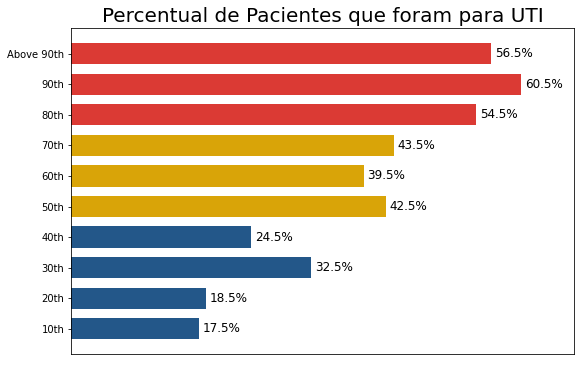

In [ ]:
# cores
cores = ['#235789', '#D9A408', '#DB3A34']
cores_lista = [cores[0],cores[0],cores[0], cores[0], cores[1], cores[1], cores[1], cores[2], cores[2], cores[2]]
# Criando o gráfico
fig, ax = plt.subplots(figsize=(9,6))
#bars = freq['Foram_para_UTI_(%)'].plot.barh(figsize=(9,6), color=cores_lista)
bars = ax.barh(freq.index, freq['Foram_para_UTI_(%)'], 0.7, color=cores_lista)
for bar in bars:
  width = bar.get_width()+0.5
  label_x = str(round(width,1))+str('%')
  label_y_pos = bar.get_y() + bar.get_height()/2
  ax.text(width, label_y_pos, s=label_x, va='center', fontsize=12)

# Ocultando valores no eixo x
ax.get_xaxis().set_visible(False)
# Delimitando eixo x
plt.xlim(0, 67)
# Apagando o eixo y
plt.ylabel('')
# Titulo
plt.title('Percentual de Pacientes que foram para UTI', fontsize=20)
plt.show()

Analisando o gráfico, podemos ver que dos 10th até os 40th a grande maioria dos pacientes não vão para o ICU, portanto iremos agrupar essas categorias.

Seguindo o mesmo raciocinio também vamos agrupar os pacientes de 50th até 70th e os pacientes de 80th até Above 90th.

In [ ]:
# Definindo o dicionário de mapeamento
dict_group_map = {
    '10th': 0,
    '20th': 0,
    '30th': 0,
    '40th': 0,
    '50th': 1,
    '60th': 1,
    '70th': 1,
    '80th': 2,
    '90th': 2,
    'Above 90th': 2,
}

# Realizando o encoding da feature e gerando a nova feature AGE_PERCENTIL_LE_2
dados['AGE_PERCENTIL_LE_2'] = dados['AGE_PERCENTIL'].map(dict_group_map)

# Visualizando o resultado do Encoding
pd.DataFrame(list(dict_group_map.items()), columns=['AGE_PERCENTIL', 'AGE_PERCENTIL_LE_2'])

,AGE_PERCENTIL,AGE_PERCENTIL_LE_2
0,10th,0
1,20th,0
2,30th,0
3,40th,0
4,50th,1
5,60th,1
6,70th,1
7,80th,2
8,90th,2
9,Above 90th,2


Como uma alternativa, podemos utilizar o método One Hot Encoding para criar uma coluna para cada categoria diferente dessa feature e poder passar essas informações de um outro ângulo para nosso modelo.

In [ ]:
# Criando o One Hot Encoder para o AGE_PERCENTIL
onehotencoder = OneHotEncoder()
a = np.array(dados['AGE_PERCENTIL']).reshape(-1, 1)
x = pd.DataFrame(onehotencoder.fit_transform(a).toarray())
x.columns = onehotencoder.categories_[0].tolist()
# Juntando o One Hot Encoding com os outros Dados
dados = pd.concat([dados, x], axis=1)
# Visualizando o One Hot Encoding
x

,10th,20th,30th,40th,50th,60th,70th,80th,90th,Above 90th
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
289,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
292,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Criando o One Hot Encoder para o AGE_PERCENTIL_LE_2
onehotencoder = OneHotEncoder()
a = np.array(dados['AGE_PERCENTIL_LE_2']).reshape(-1, 1)
x = pd.DataFrame(onehotencoder.fit_transform(a).toarray())
x.columns = ['AGE_PERCENTIL_LE_2_'+str(i) for i in onehotencoder.categories_[0].tolist()]
# Juntando o One Hot Encoding com os outros Dados
dados = pd.concat([dados, x], axis=1)
# Visualizando o One Hot Encoding
x

,AGE_PERCENTIL_LE_2_0,AGE_PERCENTIL_LE_2_1,AGE_PERCENTIL_LE_2_2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
289,1.0,0.0,0.0
290,0.0,0.0,1.0
291,0.0,1.0,0.0
292,1.0,0.0,0.0


In [ ]:
# Visualizando número de linhas e colunas de como nosso dataframe ficou
dados.shape

(294, 244)

Agora que criamos as novas colunas com o One Hot Encoding, vamos passar todas essas novas colunas para o tipo int64, para que não se misturem no resto do processamento dos dados com as colunas que realmente são do tipo float.

In [ ]:
# Selecionando asnovas colunas criadas pelo One Hot Encoding
col_float_to_int = ['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', 'Above 90th', 'AGE_PERCENTIL_LE_2_0', 'AGE_PERCENTIL_LE_2_1', 'AGE_PERCENTIL_LE_2_2']

# Transformando as novas colunas criadas pelo One Hot Encoding em int64
for coluna in col_float_to_int:
  dados[coluna] = dados[coluna].astype('int64')


Após a criação dessas novas features que irão ajudar nosso modelo de previsão, vamos remover a coluna AGE_PERCENTIL, pois ela não será mais necessária e já temos as informações dessa coluna nas duas features criadas.

In [ ]:
# Removendo a feature AGE_PERCENTIL uma vez que já criamos duas novas features a partir do encoding desta
dados = dados.drop(['AGE_PERCENTIL'], axis=1)

## Gênero

Vamos visualizar se o gênero nos diz algo sobre o paciente ir para a UTI ou não.

In [ ]:
# Criando uma tabela de frequencia
freq = pd.crosstab(dados['GENDER'], dados['ICU'], rownames=['GENDER'], colnames=['ICU'])

Vamos visualizar apenas os pacientes do gênero 0:

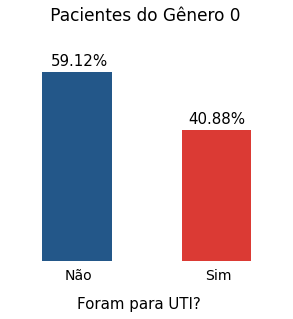

In [ ]:
# Visualizando apenas o gênero 0 em percentual (%)
gender_0 = (freq.loc[0,] / sum(freq.loc[0,])) * 100
# Visualizando gráficamente o desbalanceamento dos dados
ax=round(gender_0, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 75)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.085, -6.0, "Não", fontsize=14)
plt.text(0.92, -6.0, "Sim", fontsize=14)
# Porcentagens
ICU_Nao = round(gender_0, 2)[0]
ICU_Sim = round(gender_0, 2)[1]
plt.text(-0.185, ICU_Nao+2, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, ICU_Sim+2, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.text(-0.42, 75,'      Pacientes do Gênero 0', fontsize=17)
plt.text(0, -15,'Foram para UTI?', fontsize=15)
plt.show()

Podemos ver que o paciente ser do gênero 0 diz que tem uma tendência maior a ir para UTI, pois os dados são desbalanceados (65% não vão e 35% vão para UTI) e os pacientes do gênero 0 fogem um pouco dessa proporção tendendo a ir mais para a UTI.

Vamos visualizar apenas os pacientes do gênero 1:

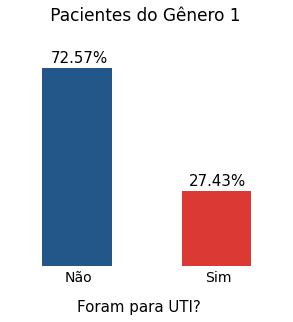

In [ ]:
# Visualizando apenas o gênero 0 em percentual (%)
gender_1 = (freq.loc[1,] / sum(freq.loc[1,])) * 100
# Visualizando gráficamente o desbalanceamento dos dados
ax=round(gender_1, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 90)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.085, -6.0, "Não", fontsize=14)
plt.text(0.92, -6.0, "Sim", fontsize=14)
# Porcentagens
ICU_Nao = round(gender_1, 2)[0]
ICU_Sim = round(gender_1, 2)[1]
plt.text(-0.185, ICU_Nao+2, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, ICU_Sim+2, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.text(-0.42, 90,'      Pacientes do Gênero 1', fontsize=17)
plt.text(0, -17,'Foram para UTI?', fontsize=15)
plt.show()

Ao contrário do gênero 0, nós podemos ver que o gênero 1 tem uma pré-disposição menor a ir para a UTI, isso nós diz que essa pode ser um atributo importante para nosso modelo conseguir diferenciar os pacientes.

## Grupos de Doenças

Como primeiro passo, iremos criar uma nova feature que informará o modelo caso o paciente esteja em algum dos grupos de doença.

In [ ]:
# Criando uma nova feature que informa se o paciente está em algum grupo de doença
dados['Pacient_is_any_DISEASE_GROUPING'] = [1 if (dados['DISEASE GROUPING 1'][i] == 1 or dados['DISEASE GROUPING 2'][i] == 1 or dados['DISEASE GROUPING 3'][i] == 1 or dados['DISEASE GROUPING 4'][i] == 1 or dados['DISEASE GROUPING 5'][i] == 1) else 0 for i in range(len(dados))]

In [ ]:
# Criando uma tabela de frequencia
dict_map = {0:'Não', 1:'Sim'}
freq = pd.crosstab(dados['Pacient_is_any_DISEASE_GROUPING'].map(dict_map), dados['ICU'].map(dict_map), rownames=['Paciente Percente a Algum Grupo de Doenças'], colnames=['Foram para UTI?'])
freq

Foram para UTI?,Não,Sim
Paciente Percente a Algum Grupo de Doenças,,
Não,156,74
Sim,33,31


Quando olhamos para os pacientes que não pertencem a nenhum grupo de doenças, percebemos que todos seguem o mesmo padrão de 65% não irem para a UTI e 35% que vão. Porém isso seria o resultado esperado uma vez que nossa base também segue essa mesma proporção onde 65% dos pacientes não vão para UTI e 35% vão.

Olhando para os pacientes que pertencem a algum grupo de doenças, podemos ver que temos algo mais perto do 50% - 50%, que nos diz que se o paciente pertence ao algum grupo de doenças, ele terá mais chance de ir para na UTI.

## Tentando resolver a diferenciação dos pacientes acima de 65 anos

Como seria muito importante nosso modelo conseguir diferenciar as pessoas acima de 65 anos que vão para UTI. Vamos ver se pela diferença de gênero nessa faixa etária faz alguma diferença. Isso pode nós ajudar a criar um atributo que pode ser muito preditiva para esses pacientes.

In [ ]:
# Visualizando uma tabela cruzada
pd.crosstab(dados['AGE_ABOVE65'].map(dict_map), dados['ICU'].map(dict_map), rownames=['Acima de 65 Anos'], colnames=['Foram para UTI?'])

Foram para UTI?,Não,Sim
Acima de 65 Anos,,
Não,128,45
Sim,61,60


Como podemos ver na tabela acima, as pessoas acima de 65 anos tem praticamente 50% de chance de ir para a UTI.

Vamos tentar criar uma tabela de frequência por gênero olhando apenas os pacientes acima de 65 anos:

In [ ]:
# Filtrando apenas os pacientes acima de 65 anos
dados_com_pacientes_acima_de_65 = dados[dados['AGE_ABOVE65'] == 1]
# Criando a tabela de frequência
freq = pd.crosstab(dados_com_pacientes_acima_de_65['GENDER'], dados_com_pacientes_acima_de_65['ICU'].map(dict_map), rownames=['Gênero'], colnames=['Foram para UTI?'])
freq

Foram para UTI?,Não,Sim
Gênero,,
0,34,38
1,27,22


Como podemos ver o gênero não seria um fator determinante nessa faixa etária para saber se o paciente irá para a UTI ou não.

Vamos agora testar se o paciente irá para UTI estando em algum grupo de doença e acima de 65 anos.

In [ ]:
freq = pd.crosstab(dados_com_pacientes_acima_de_65['Pacient_is_any_DISEASE_GROUPING'], dados_com_pacientes_acima_de_65['ICU'], rownames=['Paciente Percente a Algum Grupo de Doenças'], colnames=['UTI'])
# Fazendo a tabela em termos percentuais em relação ao grupo com DISEASE GROUPING e ao grupo sem
salvando_resultado_Diasease_False = list((freq.loc[0,] / sum(freq.loc[0,])) * 100)
salvando_resultado_Diasease_True = list((freq.loc[1,] / sum(freq.loc[1,])) * 100)
freq = pd.crosstab(dados_com_pacientes_acima_de_65['Pacient_is_any_DISEASE_GROUPING'].map(dict_map), dados_com_pacientes_acima_de_65['ICU'].map(dict_map), rownames=['Paciente Percente a Algum Grupo de Doenças'], colnames=['Foram para UTI?'])
freq.iloc[0,0] = salvando_resultado_Diasease_False[0]
freq.iloc[0,1] = salvando_resultado_Diasease_False[1]
freq.iloc[1,0] = salvando_resultado_Diasease_True[0]
freq.iloc[1,1] = salvando_resultado_Diasease_True[1]
freq = round(freq,2)
freq

Foram para UTI?,Não,Sim
Paciente Percente a Algum Grupo de Doenças,,
Não,54.05,45.95
Sim,44.68,55.32


Podemos ver que agora conseguimos ver uma diferença. Os paciente acima de 65 anos que estão em algum dos grupos de doenças, tem uma chance de 55% ir para ICU. Caso esse mesmo paciente não estivesse em algum grupo de doença, ele teria apenas 45% de ir para a UTI.

Com essa informação em mãos, vamos criar um novo atributo para que nosso modelo consiga visualizar essa informação de uma forma fácil.

In [ ]:
# Criando uma nova feature que informa se o paciente está em algum grupo de doença
dados['Pacient_is_any_DISEASE_GROUPING_and_Above_65'] = [1 if (dados['Pacient_is_any_DISEASE_GROUPING'][i] == 1 and dados['AGE_ABOVE65'][i] == 1) else 0 for i in range(len(dados))]

## Deixando todos os dados na mesma escala

Muitos algoritmos de machine learning pedem que os dados venham na mesma escala para terem a melhor performace. 

Pensando nisso vamos passar todos os dados para uma escala entre -1 e 1.

In [ ]:
# Ajustando escala das features que são float e não estão entre -1 e 1 previamente
dados = Ajustando_Escala(dados, ['AGE_PERCENTIL_LE', 'AGE_PERCENTIL_LE_2'])

# Ajustando os dados do tipo inteiro de [0 1] para [-1 1]
dados = Ajusta_Escala_Int(dados)

# Como iremos avaliar nosso Modelo

Para avaliar a performace do modelo, foi utilizada a técnica de cross validation com 5 repartições. A afim de minimizar os efeitos da aleatóriedade, repetimos a técnica de cross validation 10 vezes e fizemos uma média de seus resultados. Obtendo assim, uma validação robusta capaz de diminuir o overfitting e aumentar a generalização dos modelos.


# Criação de uma Baseline


Antes de partir para modelo mais complexos e otimizações, iremos criar uma Regressão Logística básica como baseline. 

Esse modelo é importante para conseguirmos comparar se as melhorias que estamos fazendo nos nosso modelos estão surtindo efeito ou não.

Para esse modelo básico de regressão logistica, vamos passar todos os atributos que temos até o momento.

In [ ]:
# Criação de um modelo de regressão logística básico com todos os atributos como baseline
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10)

Resultados Alcançados
AUC Médio de Treino: 0.8703507630832047 - Intervalo: 0.8460129321150129 - 0.8946885940513964
AUC Médio de Teste: 0.7017360969992549 - Intervalo: 0.584522995613979 - 0.8189491983845307


Tivemos um resultado de 0.7015 com nosso modelo básico da regressão lógística. Vamos ver se conseguimos melhorar esse resultado com os próximos passos.

# Balanceamento dos Dados com SMOTE

Como nós discutimos anteriormente, o balanceamento dos dados é algo importante pois se tivermos muito mais dados de apenas uma classe, nosso modelo poderá prever tudo para essa classe e mesmo assim ele ainda terá uma suposta boa avaliação de performace.

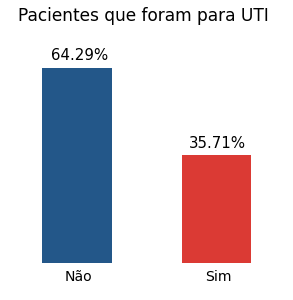

In [ ]:
# Visualizando gráficamente o desbalanceamento dos dados
ax=round(dados['ICU'].value_counts(normalize=True)*100, 2).plot.bar(figsize=(5,5), color=['#235789', '#DB3A34'])
# Delimitando eixo y
plt.ylim(-10, 80)
# Apagando eixos
ax.axis('off')
# Legendas
plt.text(-0.085, -6.0, "Não", fontsize=14)
plt.text(0.92, -6.0, "Sim", fontsize=14)
# Porcentagens
ICU_Nao = round(dados['ICU'].value_counts(normalize=True)*100, 2)[0]
ICU_Sim = round(dados['ICU'].value_counts(normalize=True)*100, 2)[1]
plt.text(-0.185, 67, str(ICU_Nao)+str('%'), fontsize=15)
plt.text(0.8, 38, str(ICU_Sim)+str('%'), fontsize=15)
# Titulo
plt.text(-0.42, 80,'Pacientes que foram para UTI', fontsize=17)
plt.show()

Como podemos ver, nós temos praticamente 65% dos dados referentes a pacientes que não foram para UTI e apenas 35% de pacientes que realmente foram para UTI. 

Com isso, vemos a necessidade de balancear os dados antes de entregar para um modelo de machine learning. 

Aplicando SMOTE para Balancear os Dados:

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10, smote=True, smote_print=True)

Contagem de Classes Antes do SMOTE
0    189
1    105
Name: ICU, dtype: int64 

Contagem de Classes Depois do SMOTE
0    189
1    189
Name: ICU, dtype: int64 

Resultados Alcançados
AUC Médio de Treino: 0.9084329692372678 - Intervalo: 0.8914608876344836 - 0.925405050840052
AUC Médio de Teste: 0.8081417983080031 - Intervalo: 0.7170378921597527 - 0.8992457044562536


Nos dados de treino houve uma melhora, porém nada muito significante. Agora nos dados de teste tivemos um melhora muito significante após aplicar a técnica do SMOTE para balancear os dados.

Isso mostra como é importante termos classes balanceadas para o algoritimo da Regressão Logística.

# Seleção de Atributos Básica

Nesta seção nós iremos fazer uma seleção de atributos básica, retirando os atributos que são quase constantes e duplicados.

Apesar de técnicas básicas, nós iremos reduzir significativamente a quantidade de atributos que nosso modelo irá utilizar para treinamento, aumentando a capacidade de generalização do modelo e se tornando mais fácil para implementação em produção.

### Atributos quase Constantes

Atributos que são quase constantes não trazem informação nenhuma relevante para nosso modelo, então podemos removê-los do nosso conjunto de dados.

Antes de fazer a remoção dos atributos quase constantes, vamos ver a quantidade de atributos que nosso dataframe contém:

In [ ]:
# Visualizando quantidade de atributos
dados.shape

(294, 245)

Nós contamos com 244 atributos no momento.

Agora, vamos ver quantos atributos são quase constantes com uma tolerância de 99%:

In [ ]:
dados_sem_quasi_constants = Remove_Quasi_Constant_Features(dados, tol=0.99)

Número de Features Quase Constantes: 52 

Features que foram removidas
['ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF', 'PH_ARTERIAL_DIFF', 'PH_VENOUS_DIFF', 'PLATELETS_DIFF', 'POTASSIUM_DIFF', 'SAT02_ARTERIAL_MEDIAN', 'SAT02_ARTERIAL_MEAN', 'SAT02_ARTERIAL_MIN', 'SAT02_ARTERIAL_MAX', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_DIFF', 'SODIUM_DIFF', 'TGO_DIFF', 'TGP_DIFF', 'TTPA_DIFF', 'UREA_DIFF', 'DIMER_DIFF'

Podemos ver que removemos um total de 52 features, ou seja, existinham 52 features que tinham 99% o mesmo valor.

Mas será que a tolerância de 99% é a ideal para selecionar quais as features com baixa variância (quasi-constants)?

Vamos criar um DataFrame comparativo para entender qual seria a tolerância que deveriamos escolher.

In [ ]:
df_resultados_remove_quasi_constant = Encontrando_Tolerancia_Features_Quasi_Cosntants(dados)
df_resultados_remove_quasi_constant

,Tolerância,N° Features Removidas,AUC Treino,AUC Teste
0,0.99,52,0.909725,0.810353
1,0.98,64,0.909535,0.810821
2,0.97,66,0.906276,0.806531
3,0.96,66,0.906276,0.806531
4,0.95,67,0.906093,0.811805
5,0.94,67,0.906093,0.811805
6,0.93,69,0.901441,0.811309
7,0.92,69,0.901441,0.811309
8,0.91,75,0.898080,0.807236
9,0.90,77,0.888359,0.797152


Escolhendo a tolerância de 95% pois é a tolerância que temos a melhor generalização do modelo.

In [ ]:
dados, _ = Remove_Quasi_Constant_Features(dados, tol=0.95)

Número de Features Quase Constantes: 67 

Features que foram removidas
['DISEASE GROUPING 2', 'DISEASE GROUPING 4', 'DISEASE GROUPING 6', 'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_MEDIAN', 'P02_ARTERIAL_MEAN', 'P02_ARTERIAL_MIN', 'P02_ARTERIAL_MAX', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_MEDIAN', 'PC02_ARTERIAL_MEAN', 'PC02_ARTERIAL_MIN', 'PC02_ARTERIAL_MAX', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF', 'PH_ARTERIAL_MEDIAN', 'PH_ARTERIAL_MEAN', 'PH_ART

Visualizando a quantidade de features restantes:

In [ ]:
dados.shape

(294, 178)

Podemos ver que reduzimos nosso conjunto de dados de 244 atributos para apenas 177 atributos, mas será que perdemos performace?

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 0.9060926748365145 - Intervalo: 0.8911600699796617 - 0.9210252796933672
AUC Médio de Teste: 0.8118054203788274 - Intervalo: 0.7312287143306913 - 0.8923821264269636


Na verdade, nós aumentamos a performace do modelo que antes tinha um AUC de 0.8082 e agora temos um AUC de 0.8117, mesmo com 67 atributos a menos.

Isso nos demonstra que os atributos que são quase constantes além de não trazer nenhuma informação relevante para o modelo, eles podemos atrapalhar a performace.

### Atributos Duplicados

Assim como os atributos quase constantes, os atributos duplicados também podem prejudicar a performace do nosso modelo.

In [ ]:
dados, _ = Remove_Duplicated_Features(dados)

Número de Features Duplicadas: 87 

Features que foram removidas
{'DIMER_MEAN', 'SAT02_VENOUS_MIN', 'PH_VENOUS_MAX', 'SODIUM_MIN', 'UREA_MEAN', 'FFA_MAX', 'PLATELETS_MEAN', 'CREATININ_MAX', 'GGT_MEAN', 'HEMATOCRITE_MAX', 'LINFOCITOS_MAX', 'NEUTROPHILES_MIN', 'LINFOCITOS_MIN', 'PCR_MIN', 'SAT02_VENOUS_MAX', 'BIC_VENOUS_MIN', 'ALBUMIN_MAX', 'HEMATOCRITE_MIN', 'BE_VENOUS_MIN', 'SAT02_VENOUS_MEAN', 'LEUKOCYTES_MIN', 'PH_VENOUS_MEAN', 'TTPA_MEAN', 'PC02_VENOUS_MAX', 'HEMOGLOBIN_MIN', 'BILLIRUBIN_MEAN', 'CALCIUM_MIN', 'CALCIUM_MEAN', 'LINFOCITOS_MEAN', 'TGO_MEAN', 'TTPA_MIN', 'INR_MAX', 'ALBUMIN_MIN', 'GGT_MIN', 'FFA_MEAN', 'BIC_VENOUS_MAX', 'P02_VENOUS_MEAN', 'HEMOGLOBIN_MAX', 'CREATININ_MIN', 'LACTATE_MAX', 'CREATININ_MEAN', 'PLATELETS_MAX', 'GLUCOSE_MEAN', 'BILLIRUBIN_MIN', 'HEMOGLOBIN_MEAN', 'CALCIUM_MAX', 'LEUKOCYTES_MAX', 'TGO_MIN', 'PC02_VENOUS_MIN', 'TGO_MAX', 'POTASSIUM_MIN', 'BILLIRUBIN_MAX', 'PLATELETS_MIN', 'TGP_MAX', 'PC02_VENOUS_MEAN', 'TGP_MEAN', 'TTPA_MAX', 'FFA_MIN', 'NEUTRO

In [ ]:
dados.shape

(294, 91)

Nós tinhamos 87 atributos duplicados na nossa base de dados. Com isso nós passamos a ter 90 atributos remanecentes.

Mas como será que ficou a performace do nosso modelo?

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados, n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 0.8985964027431852 - Intervalo: 0.883821756587228 - 0.9133710488991424
AUC Médio de Teste: 0.8200711237553342 - Intervalo: 0.740077143071615 - 0.9000651044390534


Não é regra que removendo esses atributos a performace do modelo irá melhorar, geralmente o esperado é que a performace se mantenha, porém com menos atributos.

Nesse caso nós tivemos uma melhora, passando de AUC=0.8117 com 177 atributos para AUC=0.8200 com apenas 90 atributos. 

Aos poucos nosso modelo vai ganhando performace e melhor, dependendo de menos atributos, o que aumenta a generalização do modelo e facilita a implementação em produção.

# Regressão Logística

A partir de agora iremos começar uma nova seção para a Regressão Logística.

Isso porque até então, os métodos básicos de seleção de atributos não dependem muito do modelo que queremos treinar no final. Entretanto, os próximos passos irão afetar diretamente o treinamento do modelo. 

Então como queremos treinar uma Floresta Aleatória depois, precisamos fazer essa divisão, pois os melhores atributos que iremos selecionar no próximo passo para a Regressão Logística, não será os mesmos que para a Floresta Aleatória.

## Tratando Atributos Correlacionados

Atributos correlacionados geralmente são prejudiciais para a performace do modelo, fazendo com que um atributo com alto poder de predição, perca um pouco esse poder estando ao lado de outro atributo muito correlacionado a ele.

Quando fazemos técnicas como One Hot Encoding, temos uma tendência muito grande a inserir diversos atributos correlacionados no nosso dataset. 

Além disso, temos vários atributos que foram feitos pelo time de Data Scince do hospital Sírio-Libanês que tem grande correlação entre si. Uma prova disso é que eles mesmos informaram para tomar cuidado com isso no discritivo do conjunto de dados.

Muitos dos atributos correlacionados já foram descartados nos processos de remoção de atributos quase constantes e duplicados, porém pode haver outros que ainda não foram descartados.

Bom, só tem uma maneira de descobrir isso, não é mesmo?

Vamos enfim, remover os atributos correlacionados da nossa base de dados:

In [ ]:
# Enable se pode executar a correlação da Regressão Logística
enable_corr_rl = False

In [ ]:
# Regressão Logística
modelo = LogisticRegression()

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_corr_rl:
  # Removendo as features correlacionadas
  dados_rl, _ = Remove_Correlated_Features(modelo, dados)
  # Salvando o resultado
  dados_rl.to_csv('Result_Data_from_LogisticRegression_Correlation.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  dados_rl = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Result_Data_from_LogisticRegression_Correlation.csv', encoding = 'utf-8')
  

In [ ]:
dados_rl.shape

(294, 60)

Podemos ver que foram removidos 31 atributos.

O método que estamos utilizando, basicamente agrupa todos os atributos correlacionados acima de um limiar, nesse caso 80% (é um parâmetro que pode ser visto no notebook de funções clicando [aqui](https://github.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/blob/main/Notebooks/Funcoes_utilizadas.ipynb)). 

Após esse agrupamento ele roda nosso algoritmo de machine learning com apenas 1 atributo por vez e escolhe o atributo que teve a melhor performace em cada um dos grupos dos atributos correlacionados. 

Por esse motivo que essa seleção é perfeita para a Regressão Logística (que foi o modelo passado para fazer essa seleção), mas não é a melhor seleção dos atributos para a Floresta Aleatória por exemplo.

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl, n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 0.8950178316278833 - Intervalo: 0.8774900902810681 - 0.9125455729746985
AUC Médio de Teste: 0.8152238526615256 - Intervalo: 0.7210217933250249 - 0.9094259119980264


Dessa vez, nosso modelo perdeu um pouco de performace passando de AUC=0.8200 com 90 atributos, para AUC=0.8152 com 59 atributos.

O objetivo da seleção de atributos não é inicialmente melhorar a performace do modelo, para isso nós devemos "bolar" novas features e otimizar os hiperparâmetros do modelo. 

Como nós diminuimos bem pouco a performace do modelo, vamos considerar como sucesso o objetivo de reduzir a quantidade de atributos que era o objetivo principal nesta etapa da criação do modelo.

## Seleção de Atributos com Step Backward Selection

Como nós gostamos de selecionar a menor quantidade de atributos para nosso modelo, mantendo a performace estável, que tal remover mais alguns atributos que não estão ajudando nosso modelo a performar melhor?

E agora, iremos utilizar uma das técnicas mais performaticas de seleção de atributos (pelo menos das que eu conheço 🤣). 

O Step Backward Selection basicamente irá rodar nosso modelo removendo apenas 1 atributo por vez, ou seja, como temos 60 atributos ele vai rodar 60 vezes tirando um atributo por vez. Após isso, ele irá escolher o modelo que obteve o melhor desempenho.

Com isso, após rodar o modelo retirando apenas 1 atributo por vez (fazendo uma espécie de teste A/B) ele é capaz de intuir qual o atributo mais irrelevante para nosso modelo.

Essa técnica é uma técnica muito pesada computacionalmente pois precismos rodar nosso modelo diversas vezes, por isso fizemos várias técnicas de seleção de atributos antes de aplicar essa. 

Apesar de muito pesada computacionalmente, essa técnica promete selecionar exatamente as melhores features para o modelo específico que está testando.

In [ ]:
# Enable se pode executar o Step Backward Selection da Regressão Logística
enable_step_backward_selection_LogisticRegression = False

In [ ]:
# Regressão Logística
modelo = LogisticRegression()

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_step_backward_selection_LogisticRegression:
  # Rodando o Step Backward Selection
  sfs = Step_Backward_Selection(modelo, dados_rl, k_features=10, smote=True, smote_print=False)
  # Visualizando o resultado como um dataframe
  df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
  # Salvando o resultado
  df_sfs.to_csv('Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  df_sfs = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8')


In [ ]:
if enable_step_backward_selection_LogisticRegression:
  # Achando os melhores resultados do Step Backward Selection
  modelo = LogisticRegression()
  df_resultados_index = Achando_Melhores_Resultados_Step_Backward_Selection(df_sfs, dados_rl, modelo)

  # Salvando o resultado
  df_resultados_index.to_csv('Index_Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)

else:
  # Buscando dados salvos
  df_resultados_index = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Index_Result_Data_from_LogisticRegression_Step_Backward_Selection.csv', encoding = 'utf-8')


Visualizando o desempenho do modelo por número de atributos: 

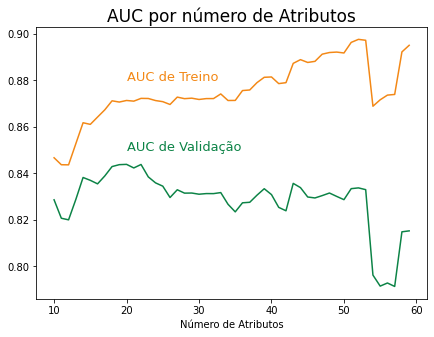

In [ ]:
# Visualizando o desempenho do modelo por número de atributos
df_resultados_index['num_de_atributos'] = [i for i in range(dados_rl.shape[1]-1, 9, -1)]
# Cores utilizadas
cor_teste = '#0C8346'
cor_treino = '#F38816'
# Tamanho da figura
plt.figure(figsize=(7,5))
# Plotando os gráfcos
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Teste', color = cor_teste)
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Treino', color = cor_treino)
# Titulo
plt.title('AUC por número de Atributos', fontsize=17)
# Label do eixo x
plt.xlabel('Número de Atributos')
# Label do eixo y
plt.ylabel('')
# Plotando texto
plt.text(20, 0.85, 'AUC de Validação', color=cor_teste, fontsize=13)
plt.text(20, 0.88, 'AUC de Treino', color=cor_treino, fontsize=13)
plt.show()

É interessante ver como que ao retirar atributos, o AUC do treino cai enquanto o AUC da validação sobe.

Isso me leva a crer que os atributos que estavam sendo retirados estavam na verdade causando overfitting do modelo nos dados de treino. 

Uma vez que retiramos eles, nosso modelo consegue generalizar melhor e isso é demonstrado com o valor de AUC de validação subindo.

Obviamente, existem atributos muito prediditos para nosso modelo e chega em um ponto que começamos a remover justamente esses atributos, pois todos que restão são muito importantes. Isso occore quando caimos para menos de 20 atributos.

In [ ]:
# Retornando o index do melhor resultado
index_melhor_resultado = df_resultados_index.sort_values(by='AUC Teste', ascending=False)['Index'].head(1).iloc[0]

# Transformando o index em uma lista
import ast
index_list = list(ast.literal_eval(df_sfs.loc[index_melhor_resultado, 'feature_idx']))
#index_list = list(df_sfs.loc[index_escolhido, 'feature_idx'])

# Pegando uma lista com as features (colunas) selecionadas / feature_idx retorna um array com os index das colunas
features_selecionadas = dados_rl.drop(['ICU'], axis=1).columns[index_list]

# Transformando em lista
features_selecionadas = [i for i in features_selecionadas]
# Adicionando variável target
features_selecionadas.append('ICU')

# Número de features
print(len(features_selecionadas))

21


No final do Step Backward Selection, nós passamos de 59 atributos para apenas 20 atributos.

E a performace do modelo, como fica após perder tudo isso de atirbutos?

In [ ]:
modelo = LogisticRegression()
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl[features_selecionadas], n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 0.8712907097795802 - Intervalo: 0.850338034656297 - 0.8922433849028635
AUC Médio de Teste: 0.8438118589503631 - Intervalo: 0.7567984642353206 - 0.9308252536654057


A performace melhorou!! Passando de AUC=0.8152 com 59 atributos para AUC=0.8438 com apenas 20 atributos.

Não falei que a técnica era boa? Só precisa ter paciência 😆.

Agora sim, estamos caminhando para um modelo cada vez mais robusto e com menos atributos.

In [ ]:
dados_rl = dados_rl[features_selecionadas].reset_index(drop=True)

## Otimização de Hiperparâmetros

Chegou o momento de otimizar os hiperparâmetros. 

Como a Regressão Logística tem poucos parâmetros para otimizar, vamos usar o GridSearchCV que irá testar todas as combinações dos parâmetros que eu passar para ele.

In [ ]:
# Enable para saber se quer rodar novamente o programa ou pegar o resultado salvo
enable_GridSearchCV_rl = False

if enable_GridSearchCV_rl:
  # Espaço dos valores dos parâmetros
  espaco_de_parametros = {
      "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
      "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
      "max_iter" : [1000]
  }

  # Rodando o GridSearchCV
  modelo = LogisticRegression()
  auc_medio_treino , auc_medio, resultados, best_index_ = roda_modelo_GridSearchCV(
      modelo, # Modelo que iremos fazer a otimização
      dados_rl, # Dados que iremos utilizar
      n_splits=5, # Número de slits do Cross Validation
      n_repeats=10, # Número de repetições que iremos fazer do Cross Validation
      smote=True, # Aplicando técnica SMOTE para balancear os dados
      espaco_de_parametros=espaco_de_parametros) # Diciónario de range de parâmetros

  melhor_parametro_encontrado = resultados.iloc[best_index_]['params']

else:
  melhor_parametro_encontrado = {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

# Visualiza melhor conjunto de parâmetros
melhor_parametro_encontrado

{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl, n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 0.8851093615469313 - Intervalo: 0.8654299051793254 - 0.9047888179145372
AUC Médio de Teste: 0.8510900651343865 - Intervalo: 0.7689546653099625 - 0.9332254649588104


Após o GridSearchCV achar a melhor combinação dos hiperparâmetros, nosso modelo passou de AUC = 0.8438 para um AUC=0.8510.

Não foi uma melhora tão significativa assim, mas de pouco em pouco, nosso modelo vai se aperfeiçoando e se a cada passo ele melhorar 1%, no final ele terá evoluido muito.

In [ ]:
# Temos um total de 20 atributos
dados_rl.shape

(294, 21)

## Buscando por Novos Atributos Preditivos

A fim de achar novas features preditivas, vamos dividir os dados em treino e validação para analisar os dados em que o modelo está errando nos dados de validação.

Vamos procurar por algum padrão que nosso modelo não está conseguindo identificar e criar novas features apartir disso.

In [ ]:
# Dividindo os dados em treino e teste
x_train_rl, x_test_rl, y_train_rl, y_test_rl = train_test_split(
  dados_rl.drop(['ICU'], axis=1), # Dados preditores (x)
  dados_rl['ICU'], # Dados alvo (y)
  test_size = 0.3, # Tamanho em (%) do conjunto de teste
  random_state = 1, # Seed (semente) para tornar o split reprodutivel
  stratify = dados_rl['ICU'] # Estratificando os dados para manter proporção entre treino e teste
)

Aplicando a técnica SMOTE para balanceamento das classes 

In [ ]:
# Selecionando as features categóricas (que são as int64 nesse caso)
categorical_features = [True if x_train_rl[coluna].dtypes == 'int64' else False for coluna in x_train_rl.columns]
# Instânciando o SMOTE
sm = SMOTENC(categorical_features)
# Realizando o Balanceamento
x_train_rl, y_train_rl = sm.fit_resample(x_train_rl, y_train_rl)
x_test_rl, y_test_rl = sm.fit_resample(x_test_rl, y_test_rl)

Agora, vamos treinar o modelo da Regressão Logística e verificar se o resultado do AUC é parecido com o que obtivemos quando estavamos fazendo o Cross Validarion.

In [ ]:
# Criando o modelo com os melhores parâmetros achados no GridSearchCV
modelo_lr = LogisticRegression(**melhor_parametro_encontrado)
# Treinando o modelo
modelo_lr.fit(x_train_rl,y_train_rl)
# Obtendo as probabilidades do modelo
y_prob = modelo_lr.predict_proba(x_test_rl)
# Verificando o AUC para essa divisão de treino e teste
roc_auc_score(y_test_rl, y_prob[:,1])

0.8467220683287165

Podemos ver que o resultado está próximo do obtivo de quando estavamos usando o cross validation.

Agora, vamos criar um dataframe para poder analisar os dados em que nosso modelo errou.

In [ ]:
# Prevendo as classes com nosso modelo para os dados de teste
ICU_hat = pd.DataFrame({'ICU_hat': modelo_lr.predict(x_test_rl)})
# Criando dataframe para fazer análise
df_analise_modelo = pd.concat([x_test_rl, y_test_rl, ICU_hat], axis=1)
# Criando uma coluna indicando se o modelo errou ou acertou
df_analise_modelo['Modelo Acertou'] = ['Sim' if df_analise_modelo['ICU'][i] == df_analise_modelo['ICU_hat'][i] else 'Não' for i in range(len(df_analise_modelo))]
# Coluna auxiliar para fazer contagem
df_analise_modelo['Contagem'] = [1 for i in range(len(df_analise_modelo))]
# Visualizando o dataframe
df_analise_modelo

,GENDER,OTHER,BIC_VENOUS_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LINFOCITOS_MEDIAN,PCR_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_DIFF_REL,TEMPERATURE_DIFF_REL,10th,20th,30th,40th,70th,AGE_PERCENTIL_LE_2_1,Pacient_is_any_DISEASE_GROUPING_and_Above_65,ICU,ICU_hat,Modelo Acertou,Contagem
0,1,1,-0.317073,0.357143,-0.912243,-0.959849,1.000000,-0.788382,-0.816635,-0.978029,0.333333,-1.0,-1.0,-1,-1,-1,-1,-1,1,-1,0,0,Sim,1
1,-1,1,-0.317073,0.357143,-0.864119,-0.959849,1.000000,-0.790456,-0.832136,-0.965000,0.037037,-1.0,-1.0,-1,-1,-1,-1,-1,-1,1,1,1,Sim,1
2,-1,-1,-0.317073,0.224490,-0.936306,-0.907152,1.000000,-0.707469,-0.266919,-0.985507,-0.135802,-1.0,-1.0,-1,1,-1,-1,-1,-1,-1,1,1,Sim,1
3,-1,1,-0.317073,0.357143,-0.913659,-0.959849,1.000000,-0.558091,-0.874858,-0.978029,0.086420,-1.0,-1.0,-1,1,-1,-1,-1,-1,-1,0,0,Sim,1
4,-1,-1,-0.317073,0.357143,-0.858457,-0.831870,1.000000,-0.759336,-0.524764,-0.976564,0.234568,-1.0,-1.0,-1,-1,-1,-1,-1,-1,-1,0,1,Não,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1,1,-0.317073,0.357143,-0.278772,-0.959849,1.000000,-0.785088,-0.720620,-0.955792,0.079627,-1.0,-1.0,-1,-1,-1,-1,-1,-1,-1,1,1,Sim,1
110,-1,1,-0.365854,0.357143,-0.871192,-0.945813,-0.763374,-0.892046,-0.636132,-0.978029,-0.193963,-1.0,-1.0,-1,-1,-1,-1,-1,-1,-1,1,1,Sim,1
111,-1,1,-0.317073,0.357143,-0.768979,-0.848554,1.000000,-0.878159,-0.592320,-0.985925,-0.288934,-1.0,-1.0,-1,-1,-1,-1,-1,-1,1,1,1,Sim,1
112,-1,1,-0.342347,0.256692,-0.881207,-0.932546,-0.809617,-0.879202,-0.919623,-0.973051,-0.301216,-1.0,-1.0,-1,-1,-1,-1,-1,-1,-1,1,1,Sim,1


Vamos tentar entender se para os dados que nosso modelo errou na validação, existe uma distribuição diferente (para os dados do tipo númerico) nos pacientes que foram para a UTI, dos pacientes que não foram.

Como são muitos atirbutos, vamos agrupar e visualizar a média:

In [ ]:
# Filtrando apenas os dados que o nosso modelo errou nos dados de teste
df_analise_modelo_errou = df_analise_modelo[df_analise_modelo['Modelo Acertou'] == "Não"]

# Máscara com colunas númericas
colunas_numericas = list(df_analise_modelo_errou.select_dtypes(include='float64').columns)
colunas_numericas.append('ICU')

# Dataframe com apenas as colunas númericas
df_analise_modelo_errou_numericas = df_analise_modelo_errou[colunas_numericas]

# Agrupando por paciente que foi na ICU ou não e tirando a média do restante
features_numericas_agrupadas = df_analise_modelo_errou_numericas.groupby(['ICU']).agg('mean')
features_numericas_agrupadas

,BIC_VENOUS_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LINFOCITOS_MEDIAN,PCR_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_DIFF_REL,TEMPERATURE_DIFF_REL
ICU,,,,,,,,,,,
0,-0.274390,0.290816,-0.894551,-0.935383,0.525876,-0.813926,-0.743667,-0.902136,-0.023148,-0.982421,-0.965816
1,-0.395122,0.343878,-0.905712,-0.956838,0.628536,-0.750909,-0.803077,-0.978380,-0.012916,-0.994585,-0.995366


Para alguns atributos não muda muito, mas para outros a diferença é muito grande da média. Portanto, vamos criar novos atributos tentando ajudar nosso modelo a enxengar essa diferença.

Vamos criar atributos categóricos que irão dizer se aquele atributo em si está acima ou abaixo da média entre os valores obtidos na tabela agrupada acima.

In [ ]:
# Copia dos dados
dados_rl_teste_nova_feature = dados_rl.copy()

# Dicionário com os pontos de corte 
dict_corte_features_numericas = {}

# Loop para adicionar uma feature categorica das features númericas
# Essa feature faz uma comparação se a feature númeria está acima ou não da média que
# diferencia ela nos dados de teste onde nosso modelo tinha errado previamente
for feature_numerica in features_numericas_agrupadas.columns:
  # Criação das features númericas
  dados_rl_teste_nova_feature['feature_cat_'+str(feature_numerica)] = [1 if dados_rl_teste_nova_feature[feature_numerica][i] > features_numericas_agrupadas[feature_numerica].mean() else -1 for i in range(len(dados_rl_teste_nova_feature))]
  # Adicionando os pontos de corte no dicionário
  dict_corte_features_numericas[feature_numerica] = features_numericas_agrupadas[feature_numerica].mean()

# Rodando o modelo com as novas features
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl_teste_nova_feature, n_splits=5, n_repeats=10, smote=True)


Resultados Alcançados
AUC Médio de Treino: 0.9084349947716974 - Intervalo: 0.8910358890482419 - 0.9258341004951529
AUC Médio de Teste: 0.8581942052856181 - Intervalo: 0.7777364240994106 - 0.9386519864718256


Obtivemos um resultado pouco superior ao modelo que tinhamos antes de adicionar esses atributos, passando de AUC=0.8510 para AUC=0.8581.

Isso quer dizer então que adicionar esses atributos não foi uma boa escolha e devemos retirá-los? Na verdade, podemos ter atributos correlacionados e duplicados que possam estar prejudicando a performace do nosso modelo.

In [ ]:
# Resultado Salvo
dict_corte_features_numericas = {'BIC_VENOUS_MEDIAN': -0.33521929964248254,
                                'BLOODPRESSURE_DIASTOLIC_MEDIAN': -0.010925167678150431,
                                'BLOODPRESSURE_SISTOLIC_DIFF_REL': -0.9885026145125,
                                'CALCIUM_MEDIAN': 0.32091836725,
                                'CREATININ_MEDIAN': -0.9020078086485521,
                                'DIMER_MEDIAN': -0.9435929416174114,
                                'INR_MEDIAN': -0.9460984995323078,
                                'LACTATE_MEDIAN': 0.577205980875,
                                'LINFOCITOS_MEDIAN': -0.786087293397154,
                                'PCR_MEDIAN': -0.7743132656512662,
                                'TEMPERATURE_DIFF_REL': -0.9805908807625}

In [ ]:
dados_rl_teste_nova_feature.shape

(294, 32)

Podemos ver que agora passamos de 20 atributos para 31 atributos.

Como não são muitos, vamos aplicar a técnica do Step Backward Selection a fim de reduzir essa quantidade de atributos.

### Step Backward Selection

Vamos então aplicar a técnica do Step Backward Selection para tentar reduzir a quantidade de atributos e ver se nosso modelo melhora ou não de performace.

In [ ]:
# Enable se pode executar o Step Backward Selection da Regressão Logística
enable_step_backward_selection_LogisticRegression_2 = False

In [ ]:
# Regressão Logística
modelo = LogisticRegression(**melhor_parametro_encontrado)

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_step_backward_selection_LogisticRegression_2:
  # Rodando o Step Backward Selection
  sfs = Step_Backward_Selection(modelo, dados_rl_teste_nova_feature, k_features=10, smote=True, smote_print=False)
  # Visualizando o resultado como um dataframe
  df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
  # Salvando o resultado
  df_sfs.to_csv('Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  df_sfs = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8')


In [ ]:
if enable_step_backward_selection_LogisticRegression_2:
  # Achando os melhores resultados do Step Backward Selection
  modelo = LogisticRegression(**melhor_parametro_encontrado)
  df_resultados_index = Achando_Melhores_Resultados_Step_Backward_Selection(df_sfs, dados_rl_teste_nova_feature, modelo)

  # Salvando o resultado
  df_resultados_index.to_csv('Index_Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8', index=False)

else:
  # Buscando dados salvos
  df_resultados_index = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/LogisticRegression/Index_Result_Data_from_LogisticRegression_Step_Backward_Selection_new_features.csv', encoding = 'utf-8')


Visualizando o desempenho do modelo por número de atributos:

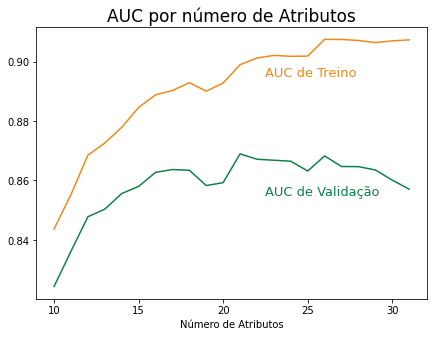

In [ ]:
# Visualizando o desempenho do modelo por número de atributos
df_resultados_index['num_de_atributos'] = [i for i in range(dados_rl_teste_nova_feature.shape[1]-1, 9, -1)]
# Cores utilizadas
cor_teste = '#0C8346'
cor_treino = '#F38816'
# Tamanho da figura
plt.figure(figsize=(7,5))
# Plotando os gráfcos
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Teste', color = cor_teste)
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Treino', color = cor_treino)
# Titulo
plt.title('AUC por número de Atributos', fontsize=17)
# Label do eixo x
plt.xlabel('Número de Atributos')
# Label do eixo y
plt.ylabel('')
# Plotando texto
plt.text(22.5, 0.855, 'AUC de Validação', color=cor_teste, fontsize=13)
plt.text(22.5, 0.895, 'AUC de Treino', color=cor_treino, fontsize=13)
plt.show()

Podemos ver o modelo teve uma pequena melhora de 31 até 21 atributos, aumentando um pouco o AUC de validação e diminuindo o AUC de treino. 

Nesse trecho nosso modelo estava diminuindo o overfitting dos dados de treino e conseguindo generalizar mais.

Porém ao passar de 21 atributos, começou a remover alguns atributos importantes e nosso modelo começou a perder poder preditivo também.

In [ ]:
# Retornando o index do melhor resultado
index_melhor_resultado = df_resultados_index.sort_values(by='AUC Teste', ascending=False)['Index'].head(1).iloc[0]

# Transformando o index em uma lista
import ast
index_list = list(ast.literal_eval(df_sfs.loc[index_melhor_resultado, 'feature_idx']))
#index_list = list(df_sfs.loc[index_escolhido, 'feature_idx'])

# Pegando uma lista com as features (colunas) selecionadas / feature_idx retorna um array com os index das colunas
features_selecionadas = dados_rl_teste_nova_feature.drop(['ICU'], axis=1).columns[index_list]

# Transformando em lista
features_selecionadas = [i for i in features_selecionadas]
# Adicionando variável target
features_selecionadas.append('ICU')

# Número de features
print(len(features_selecionadas))

22


Podemos ver que agora nos sobrou apenas 21 atributos, reduzindo um total de 10 atributos.

Vamos ver a performace do modelo com esses 21 atributos:

In [ ]:
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl_teste_nova_feature[features_selecionadas], n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 0.8994078976222188 - Intervalo: 0.8827030386553152 - 0.9161127565891225
AUC Médio de Teste: 0.8691843228269821 - Intervalo: 0.794894288030415 - 0.9434743576235493


Aumentamos nosso AUC de 0.8581 para 0.8691 após a seleção dos atributos.

Considerando que além disso reduzimos 10 atributos do nosso modelo, podemos considerar como uma ótima melhoria.

In [ ]:
dados_rl_teste_nova_feature = dados_rl_teste_nova_feature[features_selecionadas].reset_index(drop=True)

## Otimização de Hiperparâmetros com Novos Atributos

Vamos então para finalizar nosso modelo de Regressão Logística, otimizar novamente os hiperparâmetros com o GridSearchCV:

In [ ]:
# Enable para saber se quer rodar novamente o programa ou pegar o resultado salvo
enable_GridSearchCV_rl_2 = False

if enable_GridSearchCV_rl_2:
  # Espaço dos valores dos parâmetros
  espaco_de_parametros = {
      "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
      "C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
      "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
      "max_iter" : [1000]
  }

  # Rodando o GridSearchCV
  modelo = LogisticRegression()
  auc_medio_treino , auc_medio, resultados, best_index_ = roda_modelo_GridSearchCV(
      modelo, # Modelo que iremos fazer a otimização
      dados_rl_teste_nova_feature, # Dados que iremos utilizar
      n_splits=5, # Número de slits do Cross Validation
      n_repeats=10, # Número de repetições que iremos fazer do Cross Validation
      smote=True, # Aplicando técnica SMOTE para balancear os dados
      espaco_de_parametros=espaco_de_parametros) # Diciónario de range de parâmetros

  melhor_parametro_encontrado = resultados.iloc[best_index_]['params']

else:
  melhor_parametro_encontrado = {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

# Visualiza melhor conjunto de parâmetros
melhor_parametro_encontrado

{'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
modelo = LogisticRegression(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rl_teste_nova_feature, n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 0.9041019265083017 - Intervalo: 0.8878073718433005 - 0.9203964811733029
AUC Médio de Teste: 0.8682230291233062 - Intervalo: 0.7976995176477658 - 0.9387465405988465


Após a adição dos novos atributos e fazendo a seleção novamente, aumentamos 1 atributo ao total do nosso modelo e conseguimos aumentar a performace do AUC dele em mais ou menos 1,5% também.

Portanto iremos manter essa troca, visto que chegamos no melhor modelo que conseguimos para a Regressão Logística.

In [ ]:
# Temos um total de 21 atributos
dados_rl_teste_nova_feature.shape

(294, 22)

# Floresta Aleatória

Para não dizer que ficamos apenas com a Regressão Logística, vamos agora testar a Floresta Aleatória com nosso conjunto de dados.

Porém, iremos voltar na seleção de atributos correlacionados pois como eu havia mencionado, apartir desse ponto nós estamos otimizando para um modelo específico e os atributos selecionados para a Regressão Logística podem não ser os mesmos que a Floresta Aleatória selecionaria.

## Tratando Atributos Correlacionados

Pois então, vamos dar inicio a seleção de atributos correlacionados para a Floresta Aleatória:

In [ ]:
# Enable se pode executar a correlação da Random Forest
enable_corr_rf = False

In [ ]:
# Floresta Aleatória
modelo = RandomForestClassifier(n_estimators=200)

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_corr_rf:
  # Removendo as features correlacionadas
  dados_rf, _ = Remove_Correlated_Features(modelo, dados)
  # Salvando o resultado
  dados_rf.to_csv('Result_Data_from_RandomForest_Correlation.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  dados_rf = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/RandomForest/Result_Data_from_RandomForest_Correlation.csv', encoding = 'utf-8')
  

In [ ]:
dados_rf.shape

(294, 60)

Podemos ver que nesse momento foram selecionados 59 atributos.

Essa foi a mesma quantidade selecionada pela Regressão Logística, que obviamente faz sentido pois o algoritmo primeiro agrupa os atributos em grupos correlacionados e após isso usa o modelo para selecionar um por grupo.

Apesar do número de atributos serem os mesmo, não quer dizer que a Floresta Aleatória tenha selecionado os mesmos que a Regressão Logística tinha selecionado anteriormente.

In [ ]:
modelo = RandomForestClassifier(n_estimators=200)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf, n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 1.0 - Intervalo: 0.9999999999999999 - 1.0
AUC Médio de Teste: 0.8816090813805495 - Intervalo: 0.8025202364043496 - 0.9606979263567494


Podemos ver que nossa Floresta Aleatória já conseguiu um AUC de 0.8816, batendo já o melhor resultado que a Rgressão Logística tinha conseguido que era um pouco menos de 0.87.

## Seleção de Atributos com Step Backward Selection

Vamos agora aplicar a técnica Step Backward Selection para selecionar os melhores atributos para a Floresta Aleatória, uma vez que nesse momento, temos um total de 59 atributos.

In [ ]:
# Enable se pode executar o Step Backward Selection da Random Forest
enable_step_backward_selection_RandomForest = False

In [ ]:
# Floresta Aleatória
modelo = RandomForestClassifier(n_estimators=200, n_jobs=-1)

# Enable para saber se deve repetir o processo ou pegar os dados salvos
if enable_step_backward_selection_RandomForest:
  # Rodando o Step Backward Selection
  sfs = Step_Backward_Selection(modelo, dados_rf, k_features=10, smote=True, smote_print=False)
  # Visualizando o resultado como um dataframe
  df_sfs = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
  # Salvando o resultado
  df_sfs.to_csv('Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)
else:
  # Buscando dados salvos
  df_sfs = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/RandomForest/Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8')


In [ ]:
if enable_step_backward_selection_RandomForest:
  # Achando os melhores resultados do Step Backward Selection
  modelo = RandomForestClassifier(n_estimators=200)
  df_resultados_index = Achando_Melhores_Resultados_Step_Backward_Selection(df_sfs, dados_rf, modelo)

  # Salvando o resultado
  df_resultados_index.to_csv('Index_Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8', index=False)

else:
  # Buscando dados salvos
  df_resultados_index = pd.read_csv('https://raw.githubusercontent.com/rodrigodemend/Diagnostico-de-Dados-Clinicos-com-Machine-Learning/main/Data/Model/RandomForest/Index_Result_Data_from_RandomForest_Step_Backward_Selection.csv', encoding = 'utf-8')


Visualizando o desempenho do modelo por número de atributos:

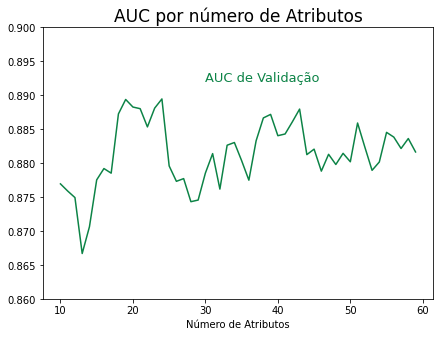

In [ ]:
# Visualizando o desempenho do modelo por número de atributos
df_resultados_index['num_de_atributos'] = [i for i in range(dados_rf.shape[1]-1, 9, -1)]
# Cores utilizadas
cor_teste = '#0C8346'
cor_treino = '#F38816'
# Tamanho da figura
plt.figure(figsize=(7,5))
# Plotando os gráfcos
sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Teste', color = cor_teste)
#sns.lineplot(data=df_resultados_index, x='num_de_atributos' , y='AUC Treino', color = cor_treino)
# Titulo
plt.title('AUC por número de Atributos', fontsize=17)
# Label do eixo x
plt.xlabel('Número de Atributos')
# Label do eixo y
plt.ylabel('')
plt.ylim(0.86, 0.90)
# Plotando texto
plt.text(30, 0.892, 'AUC de Validação', color=cor_teste, fontsize=13)
#plt.text(22.5, 0.895, 'AUC de Treino', color=cor_treino, fontsize=13)
plt.show()

Aqui não faz sentido plotar a comparação com o AUC de Treino pois a Floresta Aleatória se mantém com o AUC de treino sempre em 1.

Sobre o AUC de validação, nós podemos ver que é bem oscilatório. Em alguns periodos parece que o modelo está generalizando mais, como no trecho de 50 até 45 atributos. 

Porém logo após ele perde algum atributo importante e começa a cair a performace novamente.

Podemos observar que o tipo ocorre perto dos 25 atributos, apartir dai o modelo fica estável por alguns atributos e após começa a cair novamente.

In [ ]:
# Retornando o index do melhor resultado
index_melhor_resultado = df_resultados_index.sort_values(by='AUC Teste', ascending=False)['Index'].head(1).iloc[0]

# Transformando o index em uma lista
import ast
index_list = list(ast.literal_eval(df_sfs.loc[index_melhor_resultado, 'feature_idx']))
#index_list = list(df_sfs.loc[index_escolhido, 'feature_idx'])

# Pegando uma lista com as features (colunas) selecionadas / feature_idx retorna um array com os index das colunas
features_selecionadas = dados_rf.drop(['ICU'], axis=1).columns[index_list]

# Transformando em lista
features_selecionadas = [i for i in features_selecionadas]
# Adicionando variável target
features_selecionadas.append('ICU')

# Número de features
print(len(features_selecionadas))

25


Após a seleção do Step Backward Selection, obtivemos um total de 24 atributos, reduzindo um total de 35 atributos.

E como ficou a performace do nosso modelo agora com apenas esses 24 atributos?

In [ ]:
modelo = RandomForestClassifier(n_estimators=200)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf[features_selecionadas], n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 1.0 - Intervalo: 0.9999999999999999 - 1.0
AUC Médio de Teste: 0.889413041850715 - Intervalo: 0.817256127994982 - 0.961569955706448


Nossa Floresta Aleatória passou de AUC=0.8816 com 59 atributos, para AUC=0.8894 com apenas 24 atributos. 

Com isso, podemos ver que houve uma pequena melhora na performace do modelo, porém o grande ganho aqui foi ter diminuído 35 features do nosso modelo.

In [ ]:
dados_rf = dados_rf[features_selecionadas].reset_index(drop=True)

In [ ]:
# Visualizando que temos apenas 24 atributos
dados_rf.shape

(294, 25)

## Otimização de Hiperparâmetros

Por fim, vamos otimizar os hiperparâmetros da nossa Floresta Aleatória.

Como são um número grande de parâmetros, se fossemos usar o GridSearchCV iria demorar muito tempo. Portanto iremos utilizar o RandomizedSearchCV.

### RandomizedSearchCV
Fazendo a busca aleatória no nosso espaço de parâmetros:

In [ ]:
enable_RandomizedSearchCV_RandomForest = False

if enable_RandomizedSearchCV_RandomForest:
  # Espaço dos valores dos parâmetros
  espaco_de_parametros = {
      'bootstrap' : [True, False],
      'criterion' : ['gini', 'entropy'],
      'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
      'max_features' : ['auto', 'sqrt', 'log2'],
      'max_samples' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
      'min_samples_leaf' : [2, 3, 5, 8, 13, 21, 34, 55],
      'min_samples_split' : [2, 3, 5, 8, 13, 21, 34, 55],
      'n_estimators' : [200, 400, 600, 800, 1000]
  }

  # Rodando o RandomizedSearchCV
  modelo = RandomForestClassifier()
  auc_medio_treino , auc_medio, resultados, best_index_ = roda_modelo_RandomizedSearchCV(
      modelo, # Modelo que iremos fazer a otimização
      dados_rf, # Dados que iremos utilizar
      n_splits=5, # Número de slits do Cross Validation
      n_repeats=10, # Número de repetições que iremos fazer do Cross Validation
      espaco_de_parametros=espaco_de_parametros, # Diciónario de range de parâmetros
      n_iter=100, # Número de iterações 
      smote=True) # Aplicando técnica SMOTE para balancear os dados
  
  # Melhor parâmetro encontrado
  melhor_parametro_encontrado = resultados.iloc[best_index_]['params']

else:
  # Melhor resultado salvo
  melhor_parametro_encontrado = {'bootstrap': True,
                                'criterion': 'gini',
                                'max_depth': 100,
                                'max_features': 'auto',
                                'max_samples': 0.9,
                                'min_samples_leaf': 2,
                                'min_samples_split': 2,
                                'n_estimators': 600}

# Visualizando o melhor conjunto de parâmetros
melhor_parametro_encontrado

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'max_samples': 0.9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 600}

In [ ]:
# Visualizando o resultado com o melhor conjunto de parâmetros encontrado
modelo = RandomForestClassifier(**melhor_parametro_encontrado)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf, n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 0.9998529554336258 - Intervalo: 0.9995464135389702 - 1.0001594973282815
AUC Médio de Teste: 0.8822336602530509 - Intervalo: 0.8103032747506925 - 0.9541640457554094


Como podemos ver, a busca aleatória não achou nenhum parâmetro que melhorasse a performace do modelo. Na verdade nosso modelo perdeu performace passando de um AUC de 0.8894 para 0.8823. 

Visto isso, não iremos continuar com os parâmetros encontrados pela RandomizedSearchCV e vamos voltar para os parâmetros que estavam previamente.

### Otimizando um parâmetro por vez

A fim de buscar outra forma de otimizar os hiperparâmetros da Floresta Aleatória, vamos otimizar um parâmetro por vez.

Vai funcionar da seguinte maneira: Primeiro vamos escolher 1 parâmetro e rodar o modelo 1 vez com todas as possibilidades desse parâmetro. Após isso vamos selecionar o parâmetro que obteve a melhor performace e vamos partir para a otimização do segundo parâmetro.

Vamos ver se assim nós iremos encontrar uma combinação de parâmetros mais eficiente que a anterior. 

In [ ]:
# Enable para saber se quer rodar novamente o programa ou pegar o resultado salvo
enable_otimiza_hiperparametro = False

if enable_otimiza_hiperparametro:
  # Espaço de parâmetros
  espaco_de_parametros = {
      'bootstrap' : [True, False],
      'criterion' : ['gini', 'entropy'],
      'max_features' : ['auto', 'sqrt', 'log2'],
      'min_samples_leaf' : [1, 2, 3, 5],
      'min_samples_split' : [2, 3, 5],
      'n_estimators' : [200, 400, 600, 800, 1000]
  }

  # Otimizando um parâmetro por vez
  param_dict = Otimiza_um_por_vez(dados_rf, espaco_de_parametros)

else:
  param_dict = {'bootstrap': False,
                'criterion': 'gini',
                'max_features': 'auto',
                'min_samples_leaf': 1,
                'min_samples_split': 2,
                'n_estimators': 1000}

# Visualizando o melhor conjunto de parâmetros
param_dict

{'bootstrap': False,
 'criterion': 'gini',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
# Visualizando o resultado com o melhor conjunto de parâmetros encontrado
modelo = RandomForestClassifier(**param_dict)
auc_treino, auc_teste = roda_modelo_cv(modelo, dados_rf, n_splits=5, n_repeats=10, smote=True)

Resultados Alcançados
AUC Médio de Treino: 1.0 - Intervalo: 1.0 - 1.0
AUC Médio de Teste: 0.903536909485663 - Intervalo: 0.8468063486087357 - 0.9602674703625903


Podemos ver que encontramos uma combinação de parâmetros que melhorou a performace do nosso modelo.

Passamos de um AUC de 0.8894 para 0.9035 com a nova combinação dos parâmetros.

Isso com apenas 24 atributos.

In [ ]:
# Visualizando que temos 24 atributos.
dados_rf.shape

(294, 25)

# Considerações Finais

Podemos concluir que as técnicas implementadas de seleção de atributos obtiveram um sucesso considerável, uma vez que o objetivo com esse tipo de técnica é reduzir o número de atributos do nosso modelo. 

Além disso conseguimos ver que por muitas vezes os atributos em excesso prejudicam a generalização dos modelos.

Obtivemos os seguintes resultados de AUC:

*   Regressão Logística: 0.8681 com 21 atributos.
*   Floresta Aleatória: 0.9035 com 24 atributos.


# Trabalhos Futuros


Obtivemos bons resultados após toda a otimização dos modelos, porém na área da saúde nós devemos ter modelos muito precisos. Acredito que nossa Regressão Logística e nossa Floresta Aleatória poderiam ser muito úteis na criação de ensembles para tentar chegar em um AUC cada vez melhor. Assim como testar outros algoritmos como SVM e KNN a fim de olhar por outros ângulos para o problema, podendo trazer um poder preditivo diferente.
